In [315]:
# 1 - BIBLIOTECAS e PACOTES

import numpy as np 
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandas.util.testing import assert_frame_equal
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
import math

In [316]:
from scipy import stats

In [317]:
import plotly.express as px
import plotly.figure_factory as ff
from copy import copy

In [318]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [319]:
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [320]:
from tensorflow import keras

In [321]:
# 2 - PROCESSAMENTO/TRATAMENTO DOS DADOS

In [322]:
milho_df = pd.read_excel('Milho-CEPEA-ESALQ.xlsx')
milho_df

INDICADOR DO MILHO ESALQ/BM&FBOVESPA  Unnamed: 1   Unnamed: 2  \
0                                     NaN         NaN          NaN   
1                            Fonte: Cepea         NaN          NaN   
2                                    Data  À vista R$  À vista US$   
3                              02/08/2004       18.24         5.98   
4                              03/08/2004       18.04         5.91   
...                                   ...         ...          ...   
4125                           25/02/2021       85.59        15.55   
4126                           26/02/2021       85.41         15.3   
4127                           01/03/2021       85.59        15.29   
4128                           02/03/2021       86.11         15.2   
4129                           03/03/2021       87.06        15.14   

      Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
4125         NaN         NaN         NaN         NaN         NaN         NaN   
4126         NaN         NaN         NaN         NaN         NaN         NaN   
4127         NaN         NaN         NaN         NaN         NaN         NaN   
4128         NaN         NaN         NaN         NaN         NaN         NaN   
4129         NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 9  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4125         NaN  
4126         NaN  
4127         NaN  
4128         NaN  
4129         NaN  

[4130 rows x 10 columns]

In [323]:
milho_df = milho_df.drop(milho_df.index[0:3])
milho_df = milho_df.drop(columns=milho_df.columns[3:])
milho_df

INDICADOR DO MILHO ESALQ/BM&FBOVESPA Unnamed: 1 Unnamed: 2
3                              02/08/2004      18.24       5.98
4                              03/08/2004      18.04       5.91
5                              04/08/2004      18.02        5.9
6                              05/08/2004      18.06       5.89
7                              06/08/2004      18.13       5.98
...                                   ...        ...        ...
4125                           25/02/2021      85.59      15.55
4126                           26/02/2021      85.41       15.3
4127                           01/03/2021      85.59      15.29
4128                           02/03/2021      86.11       15.2
4129                           03/03/2021      87.06      15.14

[4127 rows x 3 columns]

In [324]:
milho_df.rename(columns= {'INDICADOR DO MILHO ESALQ/BM&FBOVESPA': 'Data'}, inplace=True)
milho_df.rename(columns= {'Unnamed: 1': 'milho_reais'}, inplace=True)
milho_df.rename(columns= {'Unnamed: 2': 'milho_dolares'}, inplace=True)
milho_df

Data milho_reais milho_dolares
3     02/08/2004       18.24          5.98
4     03/08/2004       18.04          5.91
5     04/08/2004       18.02           5.9
6     05/08/2004       18.06          5.89
7     06/08/2004       18.13          5.98
...          ...         ...           ...
4125  25/02/2021       85.59         15.55
4126  26/02/2021       85.41          15.3
4127  01/03/2021       85.59         15.29
4128  02/03/2021       86.11          15.2
4129  03/03/2021       87.06         15.14

[4127 rows x 3 columns]

In [325]:
milho_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 3 to 4129
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Data           4127 non-null   object
 1   milho_reais    4127 non-null   object
 2   milho_dolares  4127 non-null   object
dtypes: object(3)
memory usage: 129.0+ KB


In [326]:
milho_df['milho_reais'] = milho_df['milho_reais'].astype(float)
milho_df['milho_dolares'] = milho_df['milho_dolares'].astype(float)
milho_df

Data  milho_reais  milho_dolares
3     02/08/2004        18.24           5.98
4     03/08/2004        18.04           5.91
5     04/08/2004        18.02           5.90
6     05/08/2004        18.06           5.89
7     06/08/2004        18.13           5.98
...          ...          ...            ...
4125  25/02/2021        85.59          15.55
4126  26/02/2021        85.41          15.30
4127  01/03/2021        85.59          15.29
4128  02/03/2021        86.11          15.20
4129  03/03/2021        87.06          15.14

[4127 rows x 3 columns]

In [327]:
milho_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 3 to 4129
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           4127 non-null   object 
 1   milho_reais    4127 non-null   float64
 2   milho_dolares  4127 non-null   float64
dtypes: float64(2), object(1)
memory usage: 129.0+ KB


In [328]:
milho_df['Data']

3       02/08/2004
4       03/08/2004
5       04/08/2004
6       05/08/2004
7       06/08/2004
           ...    
4125    25/02/2021
4126    26/02/2021
4127    01/03/2021
4128    02/03/2021
4129    03/03/2021
Name: Data, Length: 4127, dtype: object

In [329]:
milho_df['Data'] = pd.to_datetime(milho_df['Data'],dayfirst=True)
milho_df = milho_df.sort_values(by = ['Data'])
milho_df['Data']

3      2004-08-02
4      2004-08-03
5      2004-08-04
6      2004-08-05
7      2004-08-06
          ...    
4125   2021-02-25
4126   2021-02-26
4127   2021-03-01
4128   2021-03-02
4129   2021-03-03
Name: Data, Length: 4127, dtype: datetime64[ns]

In [330]:
milho_df.index

Int64Index([   3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
            ...
            4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129],
           dtype='int64', length=4127)

In [331]:
milho_df.index = pd.to_datetime(milho_df.Data)
milho_df.index.to_period('D')
milho_df.index

DatetimeIndex(['2004-08-02', '2004-08-03', '2004-08-04', '2004-08-05',
               '2004-08-06', '2004-08-09', '2004-08-10', '2004-08-11',
               '2004-08-12', '2004-08-13',
               ...
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03'],
              dtype='datetime64[ns]', name='Data', length=4127, freq=None)

In [332]:
milho_df.isnull().sum()

Data             0
milho_reais      0
milho_dolares    0
dtype: int64

In [333]:
ccmfut_df = pd.read_excel('CCMFUT-ProfitChart.xlsx')
ccmfut_df

Data  Abertura  Máxima  Mínima  Fechamento  Volume Financeiro
0    2021-03-05     94.10   96.46   94.10       95.85        380377381.5
1    2021-03-04     91.00   94.72   90.40       94.20        325967202.0
2    2021-03-03     89.00   91.10   88.86       91.05        211768164.0
3    2021-03-02     88.80   89.06   88.54       88.94         95795617.5
4    2021-03-01     88.92   89.18   88.00       88.70        133054398.0
...         ...       ...     ...     ...         ...                ...
2914 2008-10-02     22.64   22.64   22.64       22.64            11295.0
2915 2008-09-30     22.55   22.55   22.55       22.55           112500.0
2916 2008-09-26     22.68   22.68   22.68       22.68           565875.0
2917 2008-09-22     22.64   22.64   22.64       22.64           112950.0
2918 2008-09-19     22.64   22.64   22.64       22.64          1129500.0

[2919 rows x 6 columns]

In [334]:
ccmfut_df.rename(columns= {'Abertura': 'ccmfut_abertura'}, inplace=True)
ccmfut_df.rename(columns= {'Máxima': 'ccmfut_máxima'}, inplace=True)
ccmfut_df.rename(columns= {'Mínima': 'ccmfut_mínima'}, inplace=True)
ccmfut_df.rename(columns= {'Fechamento': 'ccmfut_fechamento'}, inplace=True)
ccmfut_df.rename(columns= {'Volume Financeiro': 'ccmfut_volume_fin'}, inplace=True)
ccmfut_df

Data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
0    2021-03-05            94.10          96.46          94.10   
1    2021-03-04            91.00          94.72          90.40   
2    2021-03-03            89.00          91.10          88.86   
3    2021-03-02            88.80          89.06          88.54   
4    2021-03-01            88.92          89.18          88.00   
...         ...              ...            ...            ...   
2914 2008-10-02            22.64          22.64          22.64   
2915 2008-09-30            22.55          22.55          22.55   
2916 2008-09-26            22.68          22.68          22.68   
2917 2008-09-22            22.64          22.64          22.64   
2918 2008-09-19            22.64          22.64          22.64   

      ccmfut_fechamento  ccmfut_volume_fin  
0                 95.85        380377381.5  
1                 94.20        325967202.0  
2                 91.05        211768164.0  
3                 88.94         95795617.5  
4                 88.70        133054398.0  
...                 ...                ...  
2914              22.64            11295.0  
2915              22.55           112500.0  
2916              22.68           565875.0  
2917              22.64           112950.0  
2918              22.64          1129500.0  

[2919 rows x 6 columns]

In [335]:
ccmfut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               2919 non-null   datetime64[ns]
 1   ccmfut_abertura    2919 non-null   float64       
 2   ccmfut_máxima      2919 non-null   float64       
 3   ccmfut_mínima      2919 non-null   float64       
 4   ccmfut_fechamento  2919 non-null   float64       
 5   ccmfut_volume_fin  2919 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 137.0 KB


In [336]:
ccmfut_df = ccmfut_df.drop(ccmfut_df.index[0:2])
ccmfut_df

Data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
2    2021-03-03            89.00          91.10          88.86   
3    2021-03-02            88.80          89.06          88.54   
4    2021-03-01            88.92          89.18          88.00   
5    2021-02-26            89.61          89.64          88.86   
6    2021-02-25            89.45          89.72          88.81   
...         ...              ...            ...            ...   
2914 2008-10-02            22.64          22.64          22.64   
2915 2008-09-30            22.55          22.55          22.55   
2916 2008-09-26            22.68          22.68          22.68   
2917 2008-09-22            22.64          22.64          22.64   
2918 2008-09-19            22.64          22.64          22.64   

      ccmfut_fechamento  ccmfut_volume_fin  
2                 91.05        211768164.0  
3                 88.94         95795617.5  
4                 88.70        133054398.0  
5                 88.86         69200707.5  
6                 89.63        106361550.0  
...                 ...                ...  
2914              22.64            11295.0  
2915              22.55           112500.0  
2916              22.68           565875.0  
2917              22.64           112950.0  
2918              22.64          1129500.0  

[2917 rows x 6 columns]

In [337]:
ccmfut_df = ccmfut_df.sort_values(by = ['Data'])
ccmfut_df

Data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
2918 2008-09-19            22.64          22.64          22.64   
2917 2008-09-22            22.64          22.64          22.64   
2916 2008-09-26            22.68          22.68          22.68   
2915 2008-09-30            22.55          22.55          22.55   
2914 2008-10-02            22.64          22.64          22.64   
...         ...              ...            ...            ...   
6    2021-02-25            89.45          89.72          88.81   
5    2021-02-26            89.61          89.64          88.86   
4    2021-03-01            88.92          89.18          88.00   
3    2021-03-02            88.80          89.06          88.54   
2    2021-03-03            89.00          91.10          88.86   

      ccmfut_fechamento  ccmfut_volume_fin  
2918              22.64          1129500.0  
2917              22.64           112950.0  
2916              22.68           565875.0  
2915              22.55           112500.0  
2914              22.64            11295.0  
...                 ...                ...  
6                 89.63        106361550.0  
5                 88.86         69200707.5  
4                 88.70        133054398.0  
3                 88.94         95795617.5  
2                 91.05        211768164.0  

[2917 rows x 6 columns]

In [338]:
ccmfut_df.index

Int64Index([2918, 2917, 2916, 2915, 2914, 2913, 2912, 2911, 2910, 2909,
            ...
              11,   10,    9,    8,    7,    6,    5,    4,    3,    2],
           dtype='int64', length=2917)

In [339]:
ccmfut_df.index = pd.to_datetime(ccmfut_df.Data)
ccmfut_df.index.to_period('D')
ccmfut_df.index

DatetimeIndex(['2008-09-19', '2008-09-22', '2008-09-26', '2008-09-30',
               '2008-10-02', '2008-10-03', '2008-10-06', '2008-10-07',
               '2008-10-08', '2008-10-09',
               ...
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03'],
              dtype='datetime64[ns]', name='Data', length=2917, freq=None)

In [340]:
ccmfut_df.isnull().sum()

Data                 0
ccmfut_abertura      0
ccmfut_máxima        0
ccmfut_mínima        0
ccmfut_fechamento    0
ccmfut_volume_fin    0
dtype: int64

In [341]:
milho_df.rename(columns= {'Data': 'data'}, inplace=True)
ccmfut_df.rename(columns= {'Data': 'data'}, inplace=True)

In [342]:
milho_df

data  milho_reais  milho_dolares
Data                                             
2004-08-02 2004-08-02        18.24           5.98
2004-08-03 2004-08-03        18.04           5.91
2004-08-04 2004-08-04        18.02           5.90
2004-08-05 2004-08-05        18.06           5.89
2004-08-06 2004-08-06        18.13           5.98
...               ...          ...            ...
2021-02-25 2021-02-25        85.59          15.55
2021-02-26 2021-02-26        85.41          15.30
2021-03-01 2021-03-01        85.59          15.29
2021-03-02 2021-03-02        86.11          15.20
2021-03-03 2021-03-03        87.06          15.14

[4127 rows x 3 columns]

In [343]:
ccmfut_df

data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
Data                                                                   
2008-09-19 2008-09-19            22.64          22.64          22.64   
2008-09-22 2008-09-22            22.64          22.64          22.64   
2008-09-26 2008-09-26            22.68          22.68          22.68   
2008-09-30 2008-09-30            22.55          22.55          22.55   
2008-10-02 2008-10-02            22.64          22.64          22.64   
...               ...              ...            ...            ...   
2021-02-25 2021-02-25            89.45          89.72          88.81   
2021-02-26 2021-02-26            89.61          89.64          88.86   
2021-03-01 2021-03-01            88.92          89.18          88.00   
2021-03-02 2021-03-02            88.80          89.06          88.54   
2021-03-03 2021-03-03            89.00          91.10          88.86   

            ccmfut_fechamento  ccmfut_volume_fin  
Data                                              
2008-09-19              22.64          1129500.0  
2008-09-22              22.64           112950.0  
2008-09-26              22.68           565875.0  
2008-09-30              22.55           112500.0  
2008-10-02              22.64            11295.0  
...                       ...                ...  
2021-02-25              89.63        106361550.0  
2021-02-26              88.86         69200707.5  
2021-03-01              88.70        133054398.0  
2021-03-02              88.94         95795617.5  
2021-03-03              91.05        211768164.0  

[2917 rows x 6 columns]

In [344]:
mc_df = ccmfut_df.merge(
    milho_df.set_index('data'), how='left', on='data'
)

In [345]:
mc_df

data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
0    2008-09-19            22.64          22.64          22.64   
1    2008-09-22            22.64          22.64          22.64   
2    2008-09-26            22.68          22.68          22.68   
3    2008-09-30            22.55          22.55          22.55   
4    2008-10-02            22.64          22.64          22.64   
...         ...              ...            ...            ...   
2912 2021-02-25            89.45          89.72          88.81   
2913 2021-02-26            89.61          89.64          88.86   
2914 2021-03-01            88.92          89.18          88.00   
2915 2021-03-02            88.80          89.06          88.54   
2916 2021-03-03            89.00          91.10          88.86   

      ccmfut_fechamento  ccmfut_volume_fin  milho_reais  milho_dolares  
0                 22.64          1129500.0        23.47          12.82  
1                 22.64           112950.0        23.31          13.00  
2                 22.68           565875.0        23.24          12.54  
3                 22.55           112500.0        22.99          12.08  
4                 22.64            11295.0        22.95          11.36  
...                 ...                ...          ...            ...  
2912              89.63        106361550.0        85.59          15.55  
2913              88.86         69200707.5        85.41          15.30  
2914              88.70        133054398.0        85.59          15.29  
2915              88.94         95795617.5        86.11          15.20  
2916              91.05        211768164.0        87.06          15.14  

[2917 rows x 8 columns]

In [346]:
mc_df.isnull().sum()

data                 0
ccmfut_abertura      0
ccmfut_máxima        0
ccmfut_mínima        0
ccmfut_fechamento    0
ccmfut_volume_fin    0
milho_reais          2
milho_dolares        2
dtype: int64

In [347]:
mc_df_mvmilho_reais = mc_df["milho_reais"].rolling(5).mean().shift(-5).round(0)
mc_df_mvmilho_dolares = mc_df["milho_dolares"].rolling(5).mean().shift(-5).round(0)
mc_df["milho_reais"].fillna(mc_df_mvmilho_reais, inplace=True)
mc_df["milho_dolares"].fillna(mc_df_mvmilho_dolares, inplace=True)

In [348]:
mc_df.isnull().sum()

data                 0
ccmfut_abertura      0
ccmfut_máxima        0
ccmfut_mínima        0
ccmfut_fechamento    0
ccmfut_volume_fin    0
milho_reais          1
milho_dolares        1
dtype: int64

In [349]:
mc_df_mvmilho_reais = mc_df["milho_reais"].rolling(5).mean().shift(-5).round(0)
mc_df_mvmilho_dolares = mc_df["milho_dolares"].rolling(5).mean().shift(-5).round(0)
mc_df["milho_reais"].fillna(mc_df_mvmilho_reais, inplace=True)
mc_df["milho_dolares"].fillna(mc_df_mvmilho_dolares, inplace=True)

In [350]:
mc_df.isnull().sum()

data                 0
ccmfut_abertura      0
ccmfut_máxima        0
ccmfut_mínima        0
ccmfut_fechamento    0
ccmfut_volume_fin    0
milho_reais          0
milho_dolares        0
dtype: int64

In [351]:
mc_df = mc_df.sort_values(by = ['data'])
mc_df

data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
0    2008-09-19            22.64          22.64          22.64   
1    2008-09-22            22.64          22.64          22.64   
2    2008-09-26            22.68          22.68          22.68   
3    2008-09-30            22.55          22.55          22.55   
4    2008-10-02            22.64          22.64          22.64   
...         ...              ...            ...            ...   
2912 2021-02-25            89.45          89.72          88.81   
2913 2021-02-26            89.61          89.64          88.86   
2914 2021-03-01            88.92          89.18          88.00   
2915 2021-03-02            88.80          89.06          88.54   
2916 2021-03-03            89.00          91.10          88.86   

      ccmfut_fechamento  ccmfut_volume_fin  milho_reais  milho_dolares  
0                 22.64          1129500.0        23.47          12.82  
1                 22.64           112950.0        23.31          13.00  
2                 22.68           565875.0        23.24          12.54  
3                 22.55           112500.0        22.99          12.08  
4                 22.64            11295.0        22.95          11.36  
...                 ...                ...          ...            ...  
2912              89.63        106361550.0        85.59          15.55  
2913              88.86         69200707.5        85.41          15.30  
2914              88.70        133054398.0        85.59          15.29  
2915              88.94         95795617.5        86.11          15.20  
2916              91.05        211768164.0        87.06          15.14  

[2917 rows x 8 columns]

In [352]:
mc_df.index = pd.to_datetime(mc_df.data)
mc_df.index.to_period('D')
mc_df.index

DatetimeIndex(['2008-09-19', '2008-09-22', '2008-09-26', '2008-09-30',
               '2008-10-02', '2008-10-03', '2008-10-06', '2008-10-07',
               '2008-10-08', '2008-10-09',
               ...
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03'],
              dtype='datetime64[ns]', name='data', length=2917, freq=None)

In [353]:
mc_df

data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
data                                                                   
2008-09-19 2008-09-19            22.64          22.64          22.64   
2008-09-22 2008-09-22            22.64          22.64          22.64   
2008-09-26 2008-09-26            22.68          22.68          22.68   
2008-09-30 2008-09-30            22.55          22.55          22.55   
2008-10-02 2008-10-02            22.64          22.64          22.64   
...               ...              ...            ...            ...   
2021-02-25 2021-02-25            89.45          89.72          88.81   
2021-02-26 2021-02-26            89.61          89.64          88.86   
2021-03-01 2021-03-01            88.92          89.18          88.00   
2021-03-02 2021-03-02            88.80          89.06          88.54   
2021-03-03 2021-03-03            89.00          91.10          88.86   

            ccmfut_fechamento  ccmfut_volume_fin  milho_reais  milho_dolares  
data                                                                          
2008-09-19              22.64          1129500.0        23.47          12.82  
2008-09-22              22.64           112950.0        23.31          13.00  
2008-09-26              22.68           565875.0        23.24          12.54  
2008-09-30              22.55           112500.0        22.99          12.08  
2008-10-02              22.64            11295.0        22.95          11.36  
...                       ...                ...          ...            ...  
2021-02-25              89.63        106361550.0        85.59          15.55  
2021-02-26              88.86         69200707.5        85.41          15.30  
2021-03-01              88.70        133054398.0        85.59          15.29  
2021-03-02              88.94         95795617.5        86.11          15.20  
2021-03-03              91.05        211768164.0        87.06          15.14  

[2917 rows x 8 columns]

In [354]:
mc_df_lstm = mc_df.copy()

In [355]:
mc_df_lstm

data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
data                                                                   
2008-09-19 2008-09-19            22.64          22.64          22.64   
2008-09-22 2008-09-22            22.64          22.64          22.64   
2008-09-26 2008-09-26            22.68          22.68          22.68   
2008-09-30 2008-09-30            22.55          22.55          22.55   
2008-10-02 2008-10-02            22.64          22.64          22.64   
...               ...              ...            ...            ...   
2021-02-25 2021-02-25            89.45          89.72          88.81   
2021-02-26 2021-02-26            89.61          89.64          88.86   
2021-03-01 2021-03-01            88.92          89.18          88.00   
2021-03-02 2021-03-02            88.80          89.06          88.54   
2021-03-03 2021-03-03            89.00          91.10          88.86   

            ccmfut_fechamento  ccmfut_volume_fin  milho_reais  milho_dolares  
data                                                                          
2008-09-19              22.64          1129500.0        23.47          12.82  
2008-09-22              22.64           112950.0        23.31          13.00  
2008-09-26              22.68           565875.0        23.24          12.54  
2008-09-30              22.55           112500.0        22.99          12.08  
2008-10-02              22.64            11295.0        22.95          11.36  
...                       ...                ...          ...            ...  
2021-02-25              89.63        106361550.0        85.59          15.55  
2021-02-26              88.86         69200707.5        85.41          15.30  
2021-03-01              88.70        133054398.0        85.59          15.29  
2021-03-02              88.94         95795617.5        86.11          15.20  
2021-03-03              91.05        211768164.0        87.06          15.14  

[2917 rows x 8 columns]

In [202]:
# 3 - Analise e Exploracao dos Dados

In [203]:
milho_df.describe()

milho_reais  milho_dolares
count  4127.000000    4127.000000
mean     30.409537      11.535544
std      12.350048       3.276651
min      13.320000       5.890000
25%      21.325000       9.250000
50%      27.770000      10.720000
75%      35.375000      13.750000
max      87.060000      19.960000

In [204]:
milho_df[milho_df['milho_reais']==milho_df['milho_reais'].max()]

data  milho_reais  milho_dolares
Data                                             
2021-03-03 2021-03-03        87.06          15.14

In [205]:
milho_df[milho_df['milho_dolares']==milho_df['milho_dolares'].max()]

data  milho_reais  milho_dolares
Data                                             
2011-07-01 2011-07-01        31.08          19.96

In [206]:
milho_df[milho_df['milho_reais']==milho_df['milho_reais'].min()]

data  milho_reais  milho_dolares
Data                                             
2006-03-30 2006-03-30        13.32           6.08

In [207]:
milho_df[milho_df['milho_dolares']==milho_df['milho_dolares'].min()]

data  milho_reais  milho_dolares
Data                                             
2004-08-05 2004-08-05        18.06           5.89

C:\Users\Jonathan Lincher\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Jonathan Lincher\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



Text(0.5, 1.0, 'Distribuição do Preço do Milho em Reais')

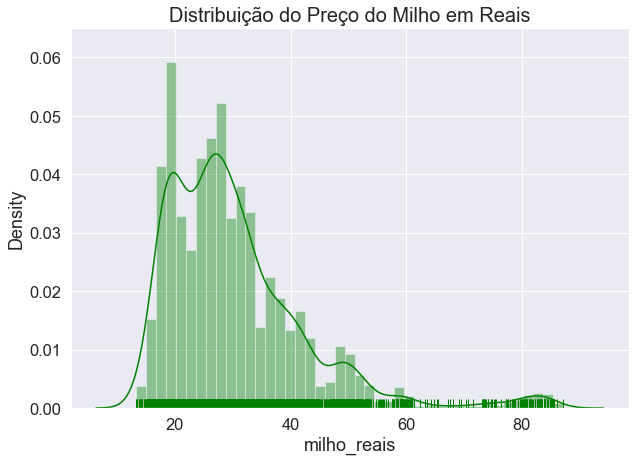

In [208]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20, 'axes.titlesize':20, 'axes.labelsize':18})
sns.distplot(milho_df['milho_reais'], rug=True, color= 'green')
sns.set_style('darkgrid')
plt.title('Distribuição do Preço do Milho em Reais')

C:\Users\Jonathan Lincher\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Jonathan Lincher\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



Text(0.5, 1.0, 'Distribuição do Preço do Milho em Dolares')

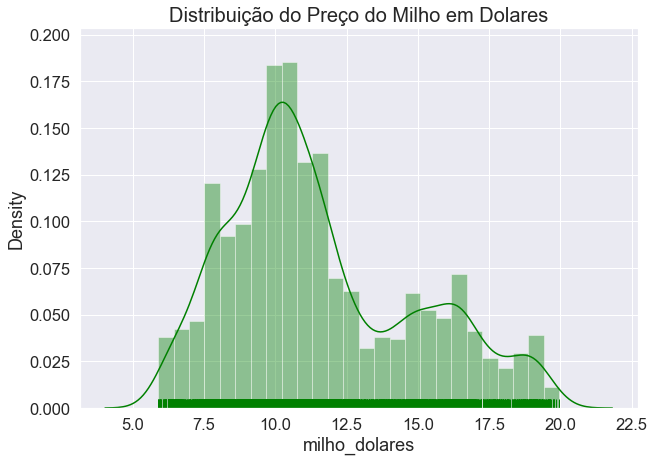

In [209]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20, 'axes.titlesize':20, 'axes.labelsize':18})
sns.distplot(milho_df['milho_dolares'], rug=True, color= 'green')
sns.set_style('darkgrid')
plt.title('Distribuição do Preço do Milho em Dolares')

In [210]:
mc_df['milho_reais'].corr(mc_df['milho_dolares'])

0.1816166279649749

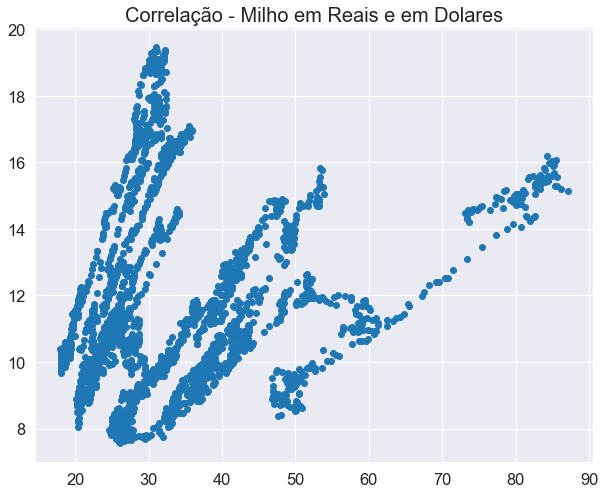

In [211]:
data1=mc_df['milho_reais']
data2=mc_df['milho_dolares']
plt.scatter(data1, data2) 
plt.title('Correlação - Milho em Reais e em Dolares') 
plt.gcf().set_size_inches(10, 8) 
plt.show()

In [212]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['data'], y = df[i], name = i)
  fig.show()

In [213]:
interactive_plot(milho_df, "Milho em Reais e Milho em Dolares")

In [214]:
dolar_df = pd.read_csv('USD_BRL Dados Históricos.csv', decimal=",")
dolar_df

Data  Último  Abertura  Máxima  Mínima    Var%
0     03.03.2021  5.6193    5.6872  5.7729  5.5806  -1,01%
1     02.03.2021  5.6764    5.6386  5.7327  5.6386   0,61%
2     01.03.2021  5.6418    5.5870  5.6427  5.5553   0,77%
3     26.02.2021  5.5986    5.5340  5.6093  5.4905   1,23%
4     25.02.2021  5.5308    5.4450  5.5390  5.4173   2,30%
...          ...     ...       ...     ...     ...     ...
4319  06.08.2004  3.0330    3.0722  3.0780  3.0300  -1,25%
4320  05.08.2004  3.0713    3.0540  3.0713  3.0500   0,58%
4321  04.08.2004  3.0537    3.0500  3.0660  3.0460   0,12%
4322  03.08.2004  3.0500    3.0450  3.0620  3.0440   0,11%
4323  02.08.2004  3.0465    3.0365  3.0585  3.0365   0,30%

[4324 rows x 6 columns]

In [215]:
dolar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4324 non-null   object 
 1   Último    4324 non-null   float64
 2   Abertura  4324 non-null   float64
 3   Máxima    4324 non-null   float64
 4   Mínima    4324 non-null   float64
 5   Var%      4324 non-null   object 
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


In [216]:
dolar_df = dolar_df.drop(columns=dolar_df.columns[2:])
dolar_df 

Data  Último
0     03.03.2021  5.6193
1     02.03.2021  5.6764
2     01.03.2021  5.6418
3     26.02.2021  5.5986
4     25.02.2021  5.5308
...          ...     ...
4319  06.08.2004  3.0330
4320  05.08.2004  3.0713
4321  04.08.2004  3.0537
4322  03.08.2004  3.0500
4323  02.08.2004  3.0465

[4324 rows x 2 columns]

In [217]:
dolar_df ['Data'] = pd.to_datetime(dolar_df ['Data'],dayfirst=True)
dolar_df = dolar_df.sort_values(by = ['Data'])
dolar_df['Data']

4323   2004-08-02
4322   2004-08-03
4321   2004-08-04
4320   2004-08-05
4319   2004-08-06
          ...    
4      2021-02-25
3      2021-02-26
2      2021-03-01
1      2021-03-02
0      2021-03-03
Name: Data, Length: 4324, dtype: datetime64[ns]

In [218]:
dolar_df.index = pd.to_datetime(dolar_df.Data)
dolar_df.index.to_period('D')
dolar_df.index

DatetimeIndex(['2004-08-02', '2004-08-03', '2004-08-04', '2004-08-05',
               '2004-08-06', '2004-08-09', '2004-08-10', '2004-08-11',
               '2004-08-12', '2004-08-13',
               ...
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
               '2021-03-02', '2021-03-03'],
              dtype='datetime64[ns]', name='Data', length=4324, freq=None)

In [219]:
dolar_df.rename(columns= {'Data': 'data'}, inplace=True)
dolar_df.rename(columns= {'Último': 'Dolar_Último'}, inplace=True)

In [220]:
dolar_df

data  Dolar_Último
Data                               
2004-08-02 2004-08-02        3.0465
2004-08-03 2004-08-03        3.0500
2004-08-04 2004-08-04        3.0537
2004-08-05 2004-08-05        3.0713
2004-08-06 2004-08-06        3.0330
...               ...           ...
2021-02-25 2021-02-25        5.5308
2021-02-26 2021-02-26        5.5986
2021-03-01 2021-03-01        5.6418
2021-03-02 2021-03-02        5.6764
2021-03-03 2021-03-03        5.6193

[4324 rows x 2 columns]

In [221]:
milho_df

data  milho_reais  milho_dolares
Data                                             
2004-08-02 2004-08-02        18.24           5.98
2004-08-03 2004-08-03        18.04           5.91
2004-08-04 2004-08-04        18.02           5.90
2004-08-05 2004-08-05        18.06           5.89
2004-08-06 2004-08-06        18.13           5.98
...               ...          ...            ...
2021-02-25 2021-02-25        85.59          15.55
2021-02-26 2021-02-26        85.41          15.30
2021-03-01 2021-03-01        85.59          15.29
2021-03-02 2021-03-02        86.11          15.20
2021-03-03 2021-03-03        87.06          15.14

[4127 rows x 3 columns]

In [222]:
dolar_milho_df = pd.merge(milho_df,dolar_df, how='inner', on=['Data'],suffixes=('_M', '_D'))
dolar_milho_df

data_M  milho_reais  milho_dolares     data_D  Dolar_Último
Data                                                                      
2004-08-02 2004-08-02        18.24           5.98 2004-08-02        3.0465
2004-08-03 2004-08-03        18.04           5.91 2004-08-03        3.0500
2004-08-04 2004-08-04        18.02           5.90 2004-08-04        3.0537
2004-08-05 2004-08-05        18.06           5.89 2004-08-05        3.0713
2004-08-06 2004-08-06        18.13           5.98 2004-08-06        3.0330
...               ...          ...            ...        ...           ...
2021-02-25 2021-02-25        85.59          15.55 2021-02-25        5.5308
2021-02-26 2021-02-26        85.41          15.30 2021-02-26        5.5986
2021-03-01 2021-03-01        85.59          15.29 2021-03-01        5.6418
2021-03-02 2021-03-02        86.11          15.20 2021-03-02        5.6764
2021-03-03 2021-03-03        87.06          15.14 2021-03-03        5.6193

[4127 rows x 5 columns]

In [223]:
dolar_milho_df = dolar_milho_df.drop(columns='data_D')
dolar_milho_df

data_M  milho_reais  milho_dolares  Dolar_Último
Data                                                           
2004-08-02 2004-08-02        18.24           5.98        3.0465
2004-08-03 2004-08-03        18.04           5.91        3.0500
2004-08-04 2004-08-04        18.02           5.90        3.0537
2004-08-05 2004-08-05        18.06           5.89        3.0713
2004-08-06 2004-08-06        18.13           5.98        3.0330
...               ...          ...            ...           ...
2021-02-25 2021-02-25        85.59          15.55        5.5308
2021-02-26 2021-02-26        85.41          15.30        5.5986
2021-03-01 2021-03-01        85.59          15.29        5.6418
2021-03-02 2021-03-02        86.11          15.20        5.6764
2021-03-03 2021-03-03        87.06          15.14        5.6193

[4127 rows x 4 columns]

In [224]:
dolar_milho_df['milho_reais'].corr(dolar_milho_df['Dolar_Último'])

0.7824021362013128

In [225]:
ccmfut_df.describe()

ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  ccmfut_fechamento  \
count      2917.000000    2917.000000    2917.000000        2917.000000   
mean         26.723809      26.988920      26.474443          26.742749   
std          13.506372      13.711821      13.312827          13.540517   
min          12.680000      12.800000      12.310000          12.710000   
25%          19.620000      19.780000      19.500000          19.640000   
50%          22.560000      22.760000      22.350000          22.560000   
75%          30.140000      30.510000      29.820000          30.140000   
max          89.730000      91.120000      89.280000          91.050000   

       ccmfut_volume_fin  
count       2.917000e+03  
mean        3.300606e+07  
std         4.274579e+07  
min         0.000000e+00  
25%         1.002070e+07  
50%         2.244742e+07  
75%         3.881796e+07  
max         6.528013e+08

C:\Users\Jonathan Lincher\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Jonathan Lincher\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



Text(0.5, 1.0, 'Distribuição do Preço de Fechamento do CCMFUT')

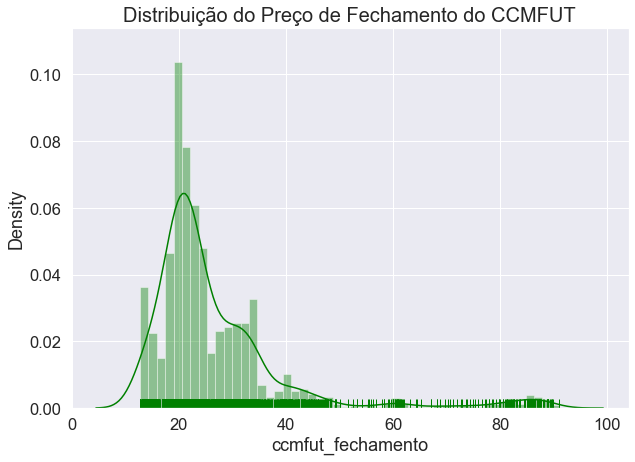

In [226]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20, 'axes.titlesize':20, 'axes.labelsize':18})
sns.distplot(ccmfut_df['ccmfut_fechamento'], rug=True, color= 'green')
sns.set_style('darkgrid')
plt.title('Distribuição do Preço de Fechamento do CCMFUT')

In [227]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['data'], y = df[i], name = i)
  fig.show()

In [228]:
interactive_plot(ccmfut_df, "Historico de Precos - CCMFUT")

In [229]:
ccmfut_df['ccmfut_fechamento'].corr(ccmfut_df['ccmfut_volume_fin'])

0.7999203525936038

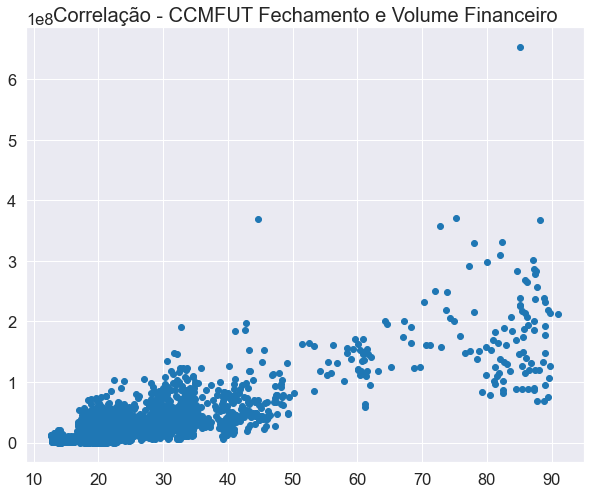

In [230]:
data1=ccmfut_df['ccmfut_fechamento']
data2=ccmfut_df['ccmfut_volume_fin']
plt.scatter(data1, data2) 
plt.title('Correlação - CCMFUT Fechamento e Volume Financeiro') 
plt.gcf().set_size_inches(10, 8) 
plt.show()

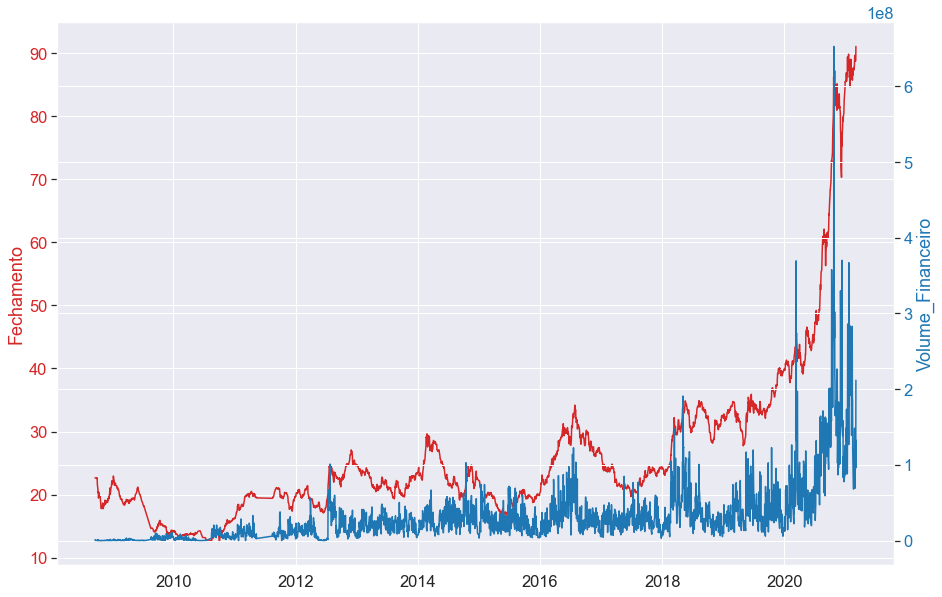

In [231]:
b = ccmfut_df["data"]
data1 = ccmfut_df["ccmfut_fechamento"]
data2 = ccmfut_df["ccmfut_volume_fin"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Fechamento', color=color)
ax1.plot(b, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Volume_Financeiro', color=color)  
ax2.plot(b, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.gcf().set_size_inches(15, 10)
plt.show()

In [232]:
mc_df['milho_reais'].corr(mc_df['ccmfut_fechamento'])

0.928074900682255

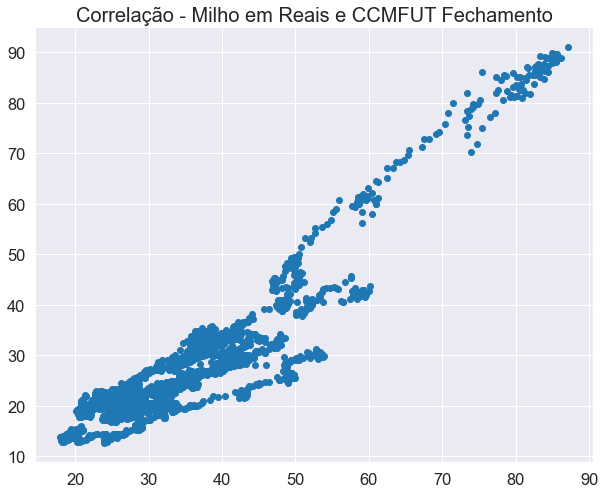

In [233]:
data1=mc_df['milho_reais']
data2=mc_df['ccmfut_fechamento']
plt.scatter(data1, data2) 
plt.title('Correlação - Milho em Reais e CCMFUT Fechamento') 
plt.gcf().set_size_inches(10, 8) 
plt.show()

In [234]:
mc_df['milho_dolares'].corr(mc_df['ccmfut_fechamento'])

0.065512943089332

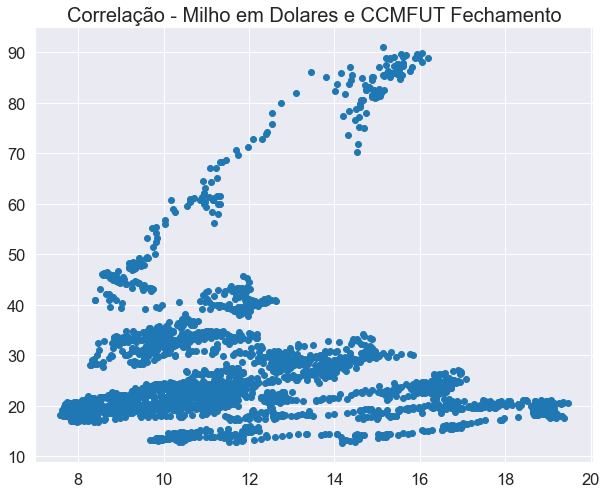

In [235]:
data1=mc_df['milho_dolares']
data2=mc_df['ccmfut_fechamento']
plt.scatter(data1, data2) 
plt.title('Correlação - Milho em Dolares e CCMFUT Fechamento') 
plt.gcf().set_size_inches(10, 8) 
plt.show()

In [236]:
mc_df = mc_df[['data', 'ccmfut_abertura', 'ccmfut_máxima', 'ccmfut_mínima' , 'ccmfut_volume_fin', 'ccmfut_fechamento' , 'milho_reais' , 'milho_dolares']]

In [237]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[5:]:
    fig.add_scatter(x = df['data'], y = df[i], name = i)
  fig.show()

In [238]:
interactive_plot(mc_df, "CCMFUT Fechamento, Milho em Reais e Milho em Dolares")

In [239]:
# 4 - Ridge Regression

In [240]:
mc_df['ccmfut_fechamento_alvo'] = mc_df[['ccmfut_fechamento']].shift(-1)
mc_df = mc_df[:-1]
mc_df

data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
data                                                                   
2008-09-19 2008-09-19            22.64          22.64          22.64   
2008-09-22 2008-09-22            22.64          22.64          22.64   
2008-09-26 2008-09-26            22.68          22.68          22.68   
2008-09-30 2008-09-30            22.55          22.55          22.55   
2008-10-02 2008-10-02            22.64          22.64          22.64   
...               ...              ...            ...            ...   
2021-02-24 2021-02-24            89.08          89.47          88.42   
2021-02-25 2021-02-25            89.45          89.72          88.81   
2021-02-26 2021-02-26            89.61          89.64          88.86   
2021-03-01 2021-03-01            88.92          89.18          88.00   
2021-03-02 2021-03-02            88.80          89.06          88.54   

            ccmfut_volume_fin  ccmfut_fechamento  milho_reais  milho_dolares  \
data                                                                           
2008-09-19          1129500.0              22.64        23.47          12.82   
2008-09-22           112950.0              22.64        23.31          13.00   
2008-09-26           565875.0              22.68        23.24          12.54   
2008-09-30           112500.0              22.55        22.99          12.08   
2008-10-02            11295.0              22.64        22.95          11.36   
...                       ...                ...          ...            ...   
2021-02-24         75830647.5              89.47        85.19          15.68   
2021-02-25        106361550.0              89.63        85.59          15.55   
2021-02-26         69200707.5              88.86        85.41          15.30   
2021-03-01        133054398.0              88.70        85.59          15.29   
2021-03-02         95795617.5              88.94        86.11          15.20   

            ccmfut_fechamento_alvo  
data                                
2008-09-19                   22.64  
2008-09-22                   22.68  
2008-09-26                   22.55  
2008-09-30                   22.64  
2008-10-02                   21.65  
...                            ...  
2021-02-24                   89.63  
2021-02-25                   88.86  
2021-02-26                   88.70  
2021-03-01                   88.94  
2021-03-02                   91.05  

[2916 rows x 9 columns]

In [241]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
mc_df_scaled = sc.fit_transform(mc_df.drop(columns = ['data']))

In [242]:
mc_df_scaled

array([[0.12926671, 0.12563841, 0.13420813, ..., 0.08071617, 0.44107744,
        0.12675517],
       [0.12926671, 0.12563841, 0.13420813, ..., 0.07836807, 0.45622896,
        0.12726576],
       [0.12978585, 0.12614913, 0.13472782, ..., 0.07734077, 0.41750842,
        0.12560633],
       ...,
       [0.99844257, 0.98110317, 0.99454333, ..., 0.98972703, 0.64983165,
        0.97000255],
       [0.98948735, 0.97522983, 0.98337014, ..., 0.99236865, 0.6489899 ,
        0.97306612],
       [0.98792992, 0.97369765, 0.99038586, ..., 1.        , 0.64141414,
        1.        ]])

In [243]:
mc_df_scaled.shape

(2916, 8)

In [244]:
X = mc_df_scaled[:,:7]
y = mc_df_scaled[:,7:]

In [245]:
X

array([[0.12926671, 0.12563841, 0.13420813, ..., 0.12877707, 0.08071617,
        0.44107744],
       [0.12926671, 0.12563841, 0.13420813, ..., 0.12877707, 0.07836807,
        0.45622896],
       [0.12978585, 0.12614913, 0.13472782, ..., 0.12929581, 0.07734077,
        0.41750842],
       ...,
       [0.99844257, 0.98110317, 0.99454333, ..., 0.98755025, 0.98972703,
        0.64983165],
       [0.98948735, 0.97522983, 0.98337014, ..., 0.9854753 , 0.99236865,
        0.6489899 ],
       [0.98792992, 0.97369765, 0.99038586, ..., 0.98858773, 1.        ,
        0.64141414]])

In [246]:
X.shape

(2916, 7)

In [247]:
X[0,6]

0.44107744107744096

In [248]:
y

array([[0.12675517],
       [0.12726576],
       [0.12560633],
       ...,
       [0.97000255],
       [0.97306612],
       [1.        ]])

In [249]:
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

((2916, 7), (2916, 1))

In [250]:
X

array([[0.12926671, 0.12563841, 0.13420813, ..., 0.12877707, 0.08071617,
        0.44107744],
       [0.12926671, 0.12563841, 0.13420813, ..., 0.12877707, 0.07836807,
        0.45622896],
       [0.12978585, 0.12614913, 0.13472782, ..., 0.12929581, 0.07734077,
        0.41750842],
       ...,
       [0.99844257, 0.98110317, 0.99454333, ..., 0.98755025, 0.98972703,
        0.64983165],
       [0.98948735, 0.97522983, 0.98337014, ..., 0.9854753 , 0.99236865,
        0.6489899 ],
       [0.98792992, 0.97369765, 0.99038586, ..., 0.98858773, 1.        ,
        0.64141414]])

In [251]:
y

array([[0.12675517],
       [0.12726576],
       [0.12560633],
       ...,
       [0.97000255],
       [0.97306612],
       [1.        ]])

In [252]:
split = int(0.70 * len(X))
X_treino = X[:split]
y_treino = y[:split]
X_teste = X[split:]
y_teste = y[split:]

In [253]:
X_treino.shape, y_treino.shape

((2041, 7), (2041, 1))

In [254]:
X_teste.shape, y_teste.shape

((875, 7), (875, 1))

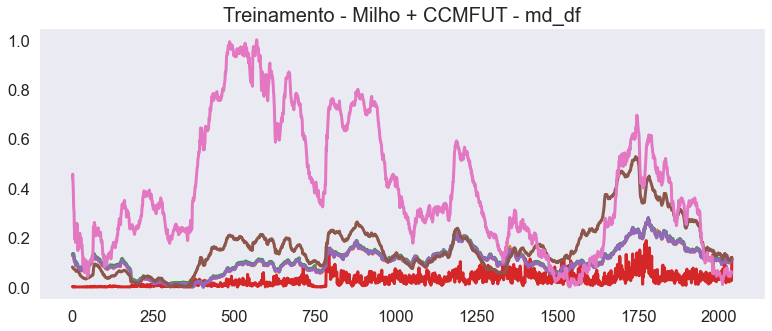

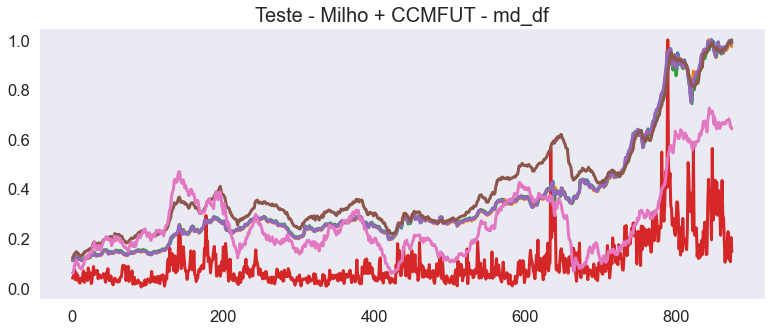

In [255]:
def show_plot_mc(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot_mc(X_treino, 'Treinamento - Milho + CCMFUT - md_df')
show_plot_mc(X_teste, 'Teste - Milho + CCMFUT - md_df')

In [256]:
from sklearn.linear_model import Ridge
regression_model = Ridge (alpha=1)
regression_model.fit(X_treino, y_treino)

Ridge(alpha=1)

In [257]:
lr_accuracy = regression_model.score(X_teste, y_teste)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9874692042284041


In [258]:
predicted_prices_mc = regression_model.predict(X)
predicted_prices_mc

array([[0.12060122],
       [0.12045201],
       [0.12093868],
       ...,
       [0.91668274],
       [0.91338118],
       [0.91366199]])

In [259]:
len(predicted_prices_mc)

2916

In [260]:
predicted_mc = []
for i in predicted_prices_mc:
  predicted_mc.append(i[0])

In [261]:
mc_fechamento = []
for i in mc_df_scaled:
  mc_fechamento.append(i[4])

In [262]:
mc_predicao = pd.DataFrame(columns = ['data' , 'mc_fechamento', 'mc_fechamento_predito'])
mc_predicao['data'] = mc_df['data']
mc_predicao['mc_fechamento'] = mc_fechamento
mc_predicao['mc_fechamento_predito'] = predicted_mc
mc_predicao

data  mc_fechamento  mc_fechamento_predito
data                                                       
2008-09-19 2008-09-19       0.128777               0.120601
2008-09-22 2008-09-22       0.128777               0.120452
2008-09-26 2008-09-26       0.129296               0.120939
2008-09-30 2008-09-30       0.127610               0.119349
2008-10-02 2008-10-02       0.128777               0.120427
...               ...            ...                    ...
2021-02-24 2021-02-24       0.995461               0.915434
2021-02-25 2021-02-25       0.997536               0.920280
2021-02-26 2021-02-26       0.987550               0.916683
2021-03-01 2021-03-01       0.985475               0.913381
2021-03-02 2021-03-02       0.988588               0.913662

[2916 rows x 3 columns]

In [263]:
def interactive_plot(data, title):
  fig = px.line(title = title)
  for i in data.columns[1:]:
    fig.add_scatter(x = data['data'], y = data[i], name = i)
  fig.show()

In [264]:
interactive_plot(mc_predicao, "CCMFUT Fechamento e CCMFUT Fechamento Predito")

In [265]:
#Cálculo do erro
mse = mean_squared_error(mc_predicao['mc_fechamento'], mc_predicao['mc_fechamento_predito'])
print('MSE: '+str(mse))
mae = mean_absolute_error(mc_predicao['mc_fechamento'], mc_predicao['mc_fechamento_predito'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(mc_predicao['mc_fechamento'], mc_predicao['mc_fechamento_predito']))
print('RMSE: '+str(rmse))

MSE: 0.0002551720660963173
MAE: 0.008955258899856846
RMSE: 0.015974106112591004


In [266]:
mc_df

data  ccmfut_abertura  ccmfut_máxima  ccmfut_mínima  \
data                                                                   
2008-09-19 2008-09-19            22.64          22.64          22.64   
2008-09-22 2008-09-22            22.64          22.64          22.64   
2008-09-26 2008-09-26            22.68          22.68          22.68   
2008-09-30 2008-09-30            22.55          22.55          22.55   
2008-10-02 2008-10-02            22.64          22.64          22.64   
...               ...              ...            ...            ...   
2021-02-24 2021-02-24            89.08          89.47          88.42   
2021-02-25 2021-02-25            89.45          89.72          88.81   
2021-02-26 2021-02-26            89.61          89.64          88.86   
2021-03-01 2021-03-01            88.92          89.18          88.00   
2021-03-02 2021-03-02            88.80          89.06          88.54   

            ccmfut_volume_fin  ccmfut_fechamento  milho_reais  milho_dolares  \
data                                                                           
2008-09-19          1129500.0              22.64        23.47          12.82   
2008-09-22           112950.0              22.64        23.31          13.00   
2008-09-26           565875.0              22.68        23.24          12.54   
2008-09-30           112500.0              22.55        22.99          12.08   
2008-10-02            11295.0              22.64        22.95          11.36   
...                       ...                ...          ...            ...   
2021-02-24         75830647.5              89.47        85.19          15.68   
2021-02-25        106361550.0              89.63        85.59          15.55   
2021-02-26         69200707.5              88.86        85.41          15.30   
2021-03-01        133054398.0              88.70        85.59          15.29   
2021-03-02         95795617.5              88.94        86.11          15.20   

            ccmfut_fechamento_alvo  
data                                
2008-09-19                   22.64  
2008-09-22                   22.68  
2008-09-26                   22.55  
2008-09-30                   22.64  
2008-10-02                   21.65  
...                            ...  
2021-02-24                   89.63  
2021-02-25                   88.86  
2021-02-26                   88.70  
2021-03-01                   88.94  
2021-03-02                   91.05  

[2916 rows x 9 columns]

In [267]:
mc_df = mc_df.drop(columns='ccmfut_abertura')
mc_df = mc_df.drop(columns='ccmfut_máxima')
mc_df = mc_df.drop(columns='ccmfut_mínima')
mc_df = mc_df.drop(columns='ccmfut_volume_fin')
mc_df = mc_df.drop(columns='milho_reais')
mc_df = mc_df.drop(columns='milho_dolares')
mc_df

data  ccmfut_fechamento  ccmfut_fechamento_alvo
data                                                            
2008-09-19 2008-09-19              22.64                   22.64
2008-09-22 2008-09-22              22.64                   22.68
2008-09-26 2008-09-26              22.68                   22.55
2008-09-30 2008-09-30              22.55                   22.64
2008-10-02 2008-10-02              22.64                   21.65
...               ...                ...                     ...
2021-02-24 2021-02-24              89.47                   89.63
2021-02-25 2021-02-25              89.63                   88.86
2021-02-26 2021-02-26              88.86                   88.70
2021-03-01 2021-03-01              88.70                   88.94
2021-03-02 2021-03-02              88.94                   91.05

[2916 rows x 3 columns]

In [268]:
mc_df_scaled_fech = sc.fit_transform(mc_df.drop(columns = ['data']))

In [269]:
X = mc_df_scaled_fech[:,:1]
y = mc_df_scaled_fech[:,1:]

In [270]:
X = np.asarray(X)
y = np.asarray(y)

In [271]:
split = int(0.70 * len(X))
X_treino = X[:split]
y_treino = y[:split]
X_teste = X[split:]
y_teste = y[split:]

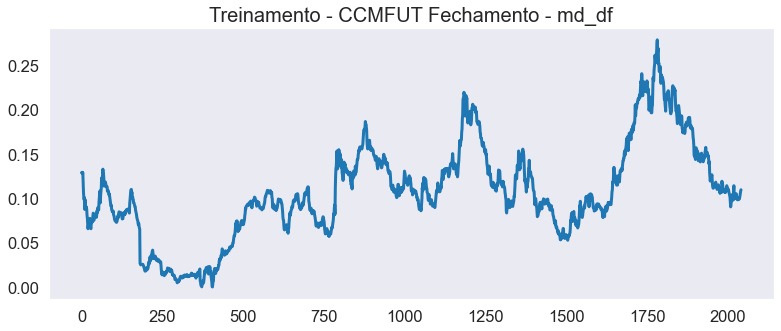

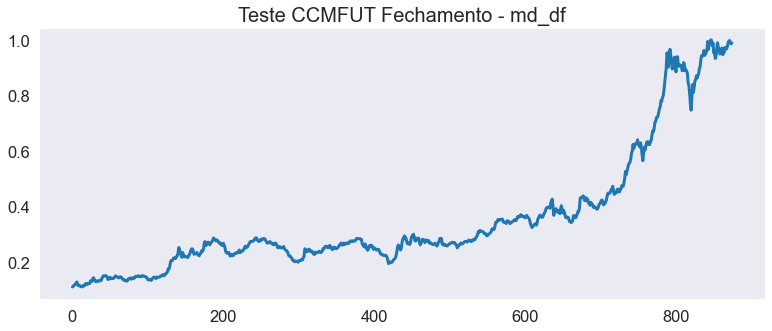

In [272]:
def show_plot_mc(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()
    
show_plot_mc(X_treino, 'Treinamento - CCMFUT Fechamento - md_df')
show_plot_mc(X_teste, 'Teste CCMFUT Fechamento - md_df')

In [273]:
regression_model.fit(X_treino, y_treino)

Ridge(alpha=1)

In [274]:
lr_accuracy = regression_model.score(X_teste, y_teste)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9484580850390733


In [275]:
predicted_prices_mc = regression_model.predict(X)
predicted_prices_mc

array([[0.12355197],
       [0.12355197],
       [0.12398756],
       ...,
       [0.84466647],
       [0.84292412],
       [0.84553764]])

In [276]:
len(predicted_prices_mc)

2916

In [277]:
predicted_mc = []
for i in predicted_prices_mc:
  predicted_mc.append(i[0])

In [278]:
mc_predicao

data  mc_fechamento  mc_fechamento_predito
data                                                       
2008-09-19 2008-09-19       0.128777               0.120601
2008-09-22 2008-09-22       0.128777               0.120452
2008-09-26 2008-09-26       0.129296               0.120939
2008-09-30 2008-09-30       0.127610               0.119349
2008-10-02 2008-10-02       0.128777               0.120427
...               ...            ...                    ...
2021-02-24 2021-02-24       0.995461               0.915434
2021-02-25 2021-02-25       0.997536               0.920280
2021-02-26 2021-02-26       0.987550               0.916683
2021-03-01 2021-03-01       0.985475               0.913381
2021-03-02 2021-03-02       0.988588               0.913662

[2916 rows x 3 columns]

In [279]:
mc_predicao = mc_predicao.drop(columns='mc_fechamento_predito')
mc_predicao

data  mc_fechamento
data                                
2008-09-19 2008-09-19       0.128777
2008-09-22 2008-09-22       0.128777
2008-09-26 2008-09-26       0.129296
2008-09-30 2008-09-30       0.127610
2008-10-02 2008-10-02       0.128777
...               ...            ...
2021-02-24 2021-02-24       0.995461
2021-02-25 2021-02-25       0.997536
2021-02-26 2021-02-26       0.987550
2021-03-01 2021-03-01       0.985475
2021-03-02 2021-03-02       0.988588

[2916 rows x 2 columns]

In [280]:
mc_predicao['mc_fechamento_predito'] = predicted_mc

In [281]:
mc_predicao

data  mc_fechamento  mc_fechamento_predito
data                                                       
2008-09-19 2008-09-19       0.128777               0.123552
2008-09-22 2008-09-22       0.128777               0.123552
2008-09-26 2008-09-26       0.129296               0.123988
2008-09-30 2008-09-30       0.127610               0.122572
2008-10-02 2008-10-02       0.128777               0.123552
...               ...            ...                    ...
2021-02-24 2021-02-24       0.995461               0.851309
2021-02-25 2021-02-25       0.997536               0.853052
2021-02-26 2021-02-26       0.987550               0.844666
2021-03-01 2021-03-01       0.985475               0.842924
2021-03-02 2021-03-02       0.988588               0.845538

[2916 rows x 3 columns]

In [282]:
interactive_plot(mc_predicao, "CCMFUT Fechamento e CCMFUT Fechamento Predito")

In [283]:
#Cálculo do erro
mse = mean_squared_error(mc_predicao['mc_fechamento'], mc_predicao['mc_fechamento_predito'])
print('MSE: '+str(mse))
mae = mean_absolute_error(mc_predicao['mc_fechamento'], mc_predicao['mc_fechamento_predito'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(mc_predicao['mc_fechamento'], mc_predicao['mc_fechamento_predito']))
print('RMSE: '+str(rmse))

MSE: 0.0009740986387099513
MAE: 0.017127976172408
RMSE: 0.03121055332271364


In [284]:
# 5 - RNN - LSTM

In [358]:
mc_df_lstm = mc_df_lstm.drop(columns='ccmfut_abertura')
mc_df_lstm = mc_df_lstm.drop(columns='ccmfut_máxima')
mc_df_lstm = mc_df_lstm.drop(columns='ccmfut_mínima')
mc_df_lstm = mc_df_lstm.drop(columns='ccmfut_volume_fin')
mc_df_lstm = mc_df_lstm.drop(columns='milho_reais')
mc_df_lstm = mc_df_lstm.drop(columns='milho_dolares')
mc_df_lstm

data  ccmfut_fechamento
data                                    
2008-09-19 2008-09-19              22.64
2008-09-22 2008-09-22              22.64
2008-09-26 2008-09-26              22.68
2008-09-30 2008-09-30              22.55
2008-10-02 2008-10-02              22.64
...               ...                ...
2021-02-25 2021-02-25              89.63
2021-02-26 2021-02-26              88.86
2021-03-01 2021-03-01              88.70
2021-03-02 2021-03-02              88.94
2021-03-03 2021-03-03              91.05

[2917 rows x 2 columns]

In [359]:
training_data = mc_df_lstm.iloc[:, 1:].values
training_data 

array([[22.64],
       [22.64],
       [22.68],
       ...,
       [88.7 ],
       [88.94],
       [91.05]])

In [360]:
len(training_data) 

2917

In [361]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [362]:
training_set_scaled

array([[0.12675517],
       [0.12675517],
       [0.12726576],
       ...,
       [0.97000255],
       [0.97306612],
       [1.        ]])

In [363]:
len(training_set_scaled)

2917

In [364]:
X = []
y = []
for i in range(1, len(mc_df_lstm)):
    X.append(training_set_scaled [i-1:i, 0]) 
    y.append(training_set_scaled [i, 0])

In [365]:
X

[array([0.12675517]),
 array([0.12675517]),
 array([0.12726576]),
 array([0.12560633]),
 array([0.12675517]),
 array([0.11411795]),
 array([0.10479959]),
 array([0.09918305]),
 array([0.09675772]),
 array([0.0990554]),
 array([0.08603523]),
 array([0.09688537]),
 array([0.09101353]),
 array([0.08871585]),
 array([0.08756702]),
 array([0.08871585]),
 array([0.08590758]),
 array([0.07952515]),
 array([0.07607863]),
 array([0.07084503]),
 array([0.06459025]),
 array([0.06803676]),
 array([0.06803676]),
 array([0.06688792]),
 array([0.07084503]),
 array([0.07148328]),
 array([0.07607863]),
 array([0.07033444]),
 array([0.06573909]),
 array([0.06459025]),
 array([0.0691856]),
 array([0.07492979]),
 array([0.07148328]),
 array([0.07378095]),
 array([0.07275977]),
 array([0.07837631]),
 array([0.08182282]),
 array([0.08131223]),
 array([0.07378095]),
 array([0.07837631]),
 array([0.08067399]),
 array([0.07952515]),
 array([0.07850396]),
 array([0.0796528]),
 array([0.08067399]),
 array([0.079

In [366]:
len(X)

2916

In [367]:
y

[0.1267551697727853,
 0.12726576461577735,
 0.12560633137605312,
 0.1267551697727853,
 0.11411794740873113,
 0.10479959152412563,
 0.09918304825121269,
 0.09675772274700026,
 0.09905539954046463,
 0.08603523104416644,
 0.09688537145774831,
 0.09101353076333926,
 0.08871585396987489,
 0.08756701557314273,
 0.08871585396987489,
 0.08590758233341844,
 0.07952514679601738,
 0.07607863160582079,
 0.07084503446515192,
 0.06459024763849885,
 0.06803676282869542,
 0.06803676282869542,
 0.06688792443196323,
 0.07084503446515192,
 0.07148327801889198,
 0.07607863160582079,
 0.0703344396221598,
 0.06573908603523104,
 0.06459024763849885,
 0.0691856012254276,
 0.07492979320908857,
 0.07148327801889198,
 0.07378095481235639,
 0.07275976512637222,
 0.0783763083992852,
 0.08182282358948176,
 0.08131222874648963,
 0.07378095481235639,
 0.0783763083992852,
 0.08067398519274957,
 0.07952514679601738,
 0.07850395711003319,
 0.07965279550676538,
 0.08067398519274957,
 0.07952514679601738,
 0.0772274700025

In [368]:
len(y)

2916

In [369]:
X = np.asarray(X)
y = np.asarray(y)

In [370]:
X.shape , y.shape

((2916, 1), (2916,))

In [371]:
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [372]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((2041, 1), (2041,), (875, 1), (875,))

In [373]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((2041, 1, 1), (875, 1, 1))

In [374]:
X_train

array([[[0.12675517]],

       [[0.12675517]],

       [[0.12726576]],

       ...,

       [[0.1037784 ]],

       [[0.10645902]],

       [[0.10786316]]])

In [375]:
X_train.shape

(2041, 1, 1)

In [376]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x) 
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 150)            91200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151 

In [377]:
 X_train.shape, y_train.shape

((2041, 1, 1), (2041,))

In [378]:
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
51/51 [==============================] - 2s 35ms/step - loss: 0.0028 - val_loss: 0.0055
Epoch 2/20
51/51 [==============================] - 0s 7ms/step - loss: 9.2601e-04 - val_loss: 7.5241e-05
Epoch 3/20
51/51 [==============================] - 0s 7ms/step - loss: 5.5461e-05 - val_loss: 2.9343e-05
Epoch 4/20
51/51 [==============================] - 0s 8ms/step - loss: 4.1545e-05 - val_loss: 2.9896e-05
Epoch 5/20
51/51 [==============================] - 0s 8ms/step - loss: 3.6132e-05 - val_loss: 3.9418e-05
Epoch 6/20
51/51 [==============================] - 0s 8ms/step - loss: 3.1212e-05 - val_loss: 3.0452e-05
Epoch 7/20
51/51 [==============================] - 0s 8ms/step - loss: 3.1003e-05 - val_loss: 2.4675e-05
Epoch 8/20
51/51 [==============================] - 0s 8ms/step - loss: 3.2583e-05 - val_loss: 3.5246e-05
Epoch 9/20
51/51 [==============================] - 0s 9ms/step - loss: 3.5316e-05 - val_loss: 5.6948e-05
Epoch 10/20
51/51 [==============================] - 

In [379]:
predicted_LSTM = model.predict(X)

In [380]:
predicted_LSTM

array([[0.12655985],
       [0.12655985],
       [0.12707622],
       ...,
       [0.94687647],
       [0.94506097],
       [0.9477838 ]], dtype=float32)

In [381]:
predicted_LSTM.shape

(2916, 1)

In [382]:
test_predicted_LSTM = []

for i in predicted_LSTM:
  test_predicted_LSTM.append(i[0]) 

In [383]:
len(test_predicted_LSTM)

2916

In [408]:
df_predicao_LSTM = pd.DataFrame(columns = ['data' , 'Fechamento', 'Fechamento_Predito'])

In [409]:
df_predicao_LSTM

Empty DataFrame
Columns: [data, Fechamento, Fechamento_Predito]
Index: []

In [410]:
mc_df_lstm

data  ccmfut_fechamento
data                                    
2008-09-19 2008-09-19              22.64
2008-09-22 2008-09-22              22.64
2008-09-26 2008-09-26              22.68
2008-09-30 2008-09-30              22.55
2008-10-02 2008-10-02              22.64
...               ...                ...
2021-02-25 2021-02-25              89.63
2021-02-26 2021-02-26              88.86
2021-03-01 2021-03-01              88.70
2021-03-02 2021-03-02              88.94
2021-03-03 2021-03-03              91.05

[2917 rows x 2 columns]

In [413]:
df_predicao_LSTM['data'] = mc_df_lstm[:-1]['data']

In [416]:
df_predicao_LSTM

data Fechamento Fechamento_Predito
data                                               
2008-09-19 2008-09-19        NaN                NaN
2008-09-22 2008-09-22        NaN                NaN
2008-09-26 2008-09-26        NaN                NaN
2008-09-30 2008-09-30        NaN                NaN
2008-10-02 2008-10-02        NaN                NaN
...               ...        ...                ...
2021-02-24 2021-02-24        NaN                NaN
2021-02-25 2021-02-25        NaN                NaN
2021-02-26 2021-02-26        NaN                NaN
2021-03-01 2021-03-01        NaN                NaN
2021-03-02 2021-03-02        NaN                NaN

[2916 rows x 3 columns]

In [417]:
Fechamento_Scaled = []
for i in training_set_scaled:
  Fechamento_Scaled.append(i[0])

In [418]:
len(Fechamento_Scaled)

2917

In [419]:
df_predicao_LSTM

data Fechamento Fechamento_Predito
data                                               
2008-09-19 2008-09-19        NaN                NaN
2008-09-22 2008-09-22        NaN                NaN
2008-09-26 2008-09-26        NaN                NaN
2008-09-30 2008-09-30        NaN                NaN
2008-10-02 2008-10-02        NaN                NaN
...               ...        ...                ...
2021-02-24 2021-02-24        NaN                NaN
2021-02-25 2021-02-25        NaN                NaN
2021-02-26 2021-02-26        NaN                NaN
2021-03-01 2021-03-01        NaN                NaN
2021-03-02 2021-03-02        NaN                NaN

[2916 rows x 3 columns]

In [420]:
df_predicao_LSTM['Fechamento'] = Fechamento_Scaled[:-1]

In [421]:
df_predicao_LSTM

data  Fechamento Fechamento_Predito
data                                                
2008-09-19 2008-09-19    0.126755                NaN
2008-09-22 2008-09-22    0.126755                NaN
2008-09-26 2008-09-26    0.127266                NaN
2008-09-30 2008-09-30    0.125606                NaN
2008-10-02 2008-10-02    0.126755                NaN
...               ...         ...                ...
2021-02-24 2021-02-24    0.979832                NaN
2021-02-25 2021-02-25    0.981874                NaN
2021-02-26 2021-02-26    0.972045                NaN
2021-03-01 2021-03-01    0.970003                NaN
2021-03-02 2021-03-02    0.973066                NaN

[2916 rows x 3 columns]

In [422]:
len(test_predicted_LSTM)

2916

In [423]:
df_predicao_LSTM['Fechamento_Predito'] = test_predicted_LSTM

In [424]:
df_predicao_LSTM

data  Fechamento  Fechamento_Predito
data                                                 
2008-09-19 2008-09-19    0.126755            0.126560
2008-09-22 2008-09-22    0.126755            0.126560
2008-09-26 2008-09-26    0.127266            0.127076
2008-09-30 2008-09-30    0.125606            0.125398
2008-10-02 2008-10-02    0.126755            0.126560
...               ...         ...                 ...
2021-02-24 2021-02-24    0.979832            0.953787
2021-02-25 2021-02-25    0.981874            0.955597
2021-02-26 2021-02-26    0.972045            0.946876
2021-03-01 2021-03-01    0.970003            0.945061
2021-03-02 2021-03-02    0.973066            0.947784

[2916 rows x 3 columns]

In [425]:
interactive_plot(df_predicao_LSTM, "LSTM - CCMFUT Fechamento e CCMFUT Fechamento Predito")

In [426]:
#Cálculo do erro
mse = mean_squared_error(df_predicao_LSTM['Fechamento'], df_predicao_LSTM['Fechamento_Predito'])
print('MSE: '+str(mse))
mae = mean_absolute_error(df_predicao_LSTM['Fechamento'], df_predicao_LSTM['Fechamento_Predito'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(df_predicao_LSTM['Fechamento'], df_predicao_LSTM['Fechamento_Predito']))
print('RMSE: '+str(rmse))

MSE: 1.2982398025594153e-05
MAE: 0.0013393199472677888
RMSE: 0.003603109493977966
